Stephanie Smith
Python API Challenge HW
WeatherPy

utilize: https://pypi.python.org/pypi/citipy

In [ ]:
#pip install citipy

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key
print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

0b3f8e2a43251d206d5aeab517c4ad2a


Generate Cities List


In [107]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [108]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [109]:
#run a test on url structure
city = "Paris"
response = requests.get(query_url + city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 73
    },
    "cod": 200,
    "coord": {
        "lat": 48.85,
        "lon": 2.35
    },
    "dt": 1580024476,
    "id": 2988507,
    "main": {
        "feels_like": -0.98,
        "humidity": 100,
        "pressure": 1016,
        "temp": 2.14,
        "temp_max": 4,
        "temp_min": -0.56
    },
    "name": "Paris",
    "sys": {
        "country": "FR",
        "id": 6550,
        "sunrise": 1580023744,
        "sunset": 1580056599,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 4000,
    "weather": [
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 2.1
    }
}


In [110]:
# set up lists to hold reponse info (will be used for df)...city already done in previous code
cityName = []
clouds = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []


# Loop through the list of cities and perform a request for data on each
set_count = 0
start_count = 49

for count, city in enumerate(cities,1):
    try:
        response = requests.get(query_url + city).json()
        cityName.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        if count/50==set_count+1:
            set_count=set_count+1
        print(f"Processing Record {count} of Set {set_count} | {city}")
    except:
        print(f"City not found.....skipping")
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

Processing Record 1 of Set 0 | mar del plata
Processing Record 2 of Set 0 | hervey bay
Processing Record 3 of Set 0 | rundu
Processing Record 4 of Set 0 | saint george
Processing Record 5 of Set 0 | richards bay
Processing Record 6 of Set 0 | hermanus
City not found.....skipping
Processing Record 8 of Set 0 | severo-kurilsk
Processing Record 9 of Set 0 | avarua
Processing Record 10 of Set 0 | butaritari
Processing Record 11 of Set 0 | sao joao da barra
Processing Record 12 of Set 0 | praia
Processing Record 13 of Set 0 | male
Processing Record 14 of Set 0 | rikitea
Processing Record 15 of Set 0 | dikson
City not found.....skipping
Processing Record 17 of Set 0 | faanui
Processing Record 18 of Set 0 | broome
Processing Record 19 of Set 0 | tiznit
City not found.....skipping
Processing Record 21 of Set 0 | hithadhoo
Processing Record 22 of Set 0 | sosua
Processing Record 23 of Set 0 | dumbrava
Processing Record 24 of Set 0 | sitka
Processing Record 25 of Set 0 | kapaa
Processing Record 2

Processing Record 208 of Set 4 | tuatapere
Processing Record 209 of Set 4 | korfovskiy
Processing Record 210 of Set 4 | waipawa
Processing Record 211 of Set 4 | axim
Processing Record 212 of Set 4 | cabo san lucas
Processing Record 213 of Set 4 | ahuimanu
Processing Record 214 of Set 4 | mahebourg
Processing Record 215 of Set 4 | daru
Processing Record 216 of Set 4 | itarema
Processing Record 217 of Set 4 | caravelas
Processing Record 218 of Set 4 | jinchang
Processing Record 219 of Set 4 | acara
Processing Record 220 of Set 4 | coihaique
Processing Record 221 of Set 4 | fairbanks
Processing Record 222 of Set 4 | rabo de peixe
Processing Record 223 of Set 4 | cuajinicuilapa
Processing Record 224 of Set 4 | ayagoz
Processing Record 225 of Set 4 | tambovka
Processing Record 226 of Set 4 | nemuro
Processing Record 227 of Set 4 | guanica
Processing Record 228 of Set 4 | ixtapa
Processing Record 229 of Set 4 | vrangel
Processing Record 230 of Set 4 | carnarvon
Processing Record 231 of Set 4

Processing Record 409 of Set 4 | viransehir
City not found.....skipping
Processing Record 411 of Set 4 | honiara
Processing Record 412 of Set 4 | cap malheureux
Processing Record 413 of Set 4 | labuan
Processing Record 414 of Set 4 | bilibino
Processing Record 415 of Set 4 | ilulissat
City not found.....skipping
Processing Record 417 of Set 4 | cartagena
Processing Record 418 of Set 4 | abha
Processing Record 419 of Set 4 | xunchang
Processing Record 420 of Set 4 | san policarpo
Processing Record 421 of Set 4 | diu
Processing Record 422 of Set 4 | kavaratti
Processing Record 423 of Set 4 | bayan
Processing Record 424 of Set 4 | dalby
Processing Record 425 of Set 4 | tocopilla
Processing Record 426 of Set 4 | kahului
Processing Record 427 of Set 4 | yantal
Processing Record 428 of Set 4 | coquimbo
Processing Record 429 of Set 4 | whitehorse
Processing Record 430 of Set 4 | hermosillo
Processing Record 431 of Set 4 | ulladulla
Processing Record 432 of Set 4 | ajaccio
Processing Record 43

In [112]:
response = requests.get(query_url + "kassala").json()
#print(json.dumps(response, indent=4, sort_keys=True))

In [113]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cityName,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": long,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mar del Plata,33,AR,1580024619,93,-38.00,-57.56,16.67,1.55
1,Hervey Bay,40,AU,1580024619,58,-25.30,152.85,30.00,5.70
2,Rundu,1,NA,1580024619,78,-17.93,19.77,24.00,2.60
3,Saint George,1,US,1580024619,57,37.10,-113.58,7.00,1.50
4,Richards Bay,0,ZA,1580024619,70,-28.78,32.04,28.73,6.37


In [114]:
weather_data.to_csv("weatherOutput.csv", index=False, header=True)

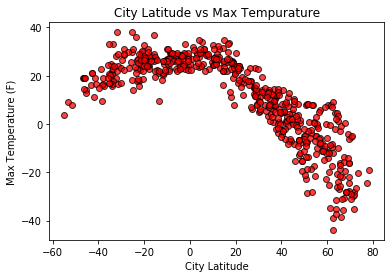

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [115]:
#scatter plot lat vs temp
x_axis = weather_data['Lat']

# Create a list of data that we will use for our y values
y_axis = weather_data['Max Temp']

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("City Latitude vs Max Tempurature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("City Latitude")
plt.show()

#save chart to a .png file
plt.savefig("cityLat_vs_windSpeed.png")
plt.show

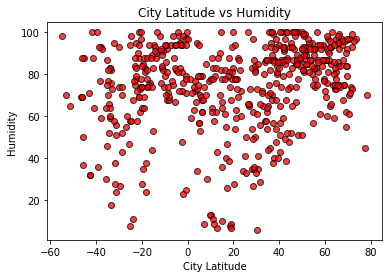

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [116]:
#scatter plot lat vs temp
x_axis = weather_data['Lat']

# Create a list of data that we will use for our y values
y_axis = weather_data['Humidity']

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("City Latitude")
plt.show()

#save chart to a .png file
plt.savefig("cityLat_vs_humidity.png")
plt.show

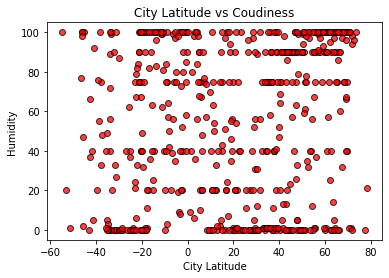

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [117]:
#scatter plot lat vs cloudiness
x_axis = weather_data['Lat']

# Create a list of data that we will use for our y values
y_axis = weather_data['Cloudiness']

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("City Latitude vs Coudiness")
plt.ylabel("Humidity")
plt.xlabel("City Latitude")
plt.show()

#save chart to a .png file
plt.savefig("cityLat_vs_cloudiness.png")
plt.show

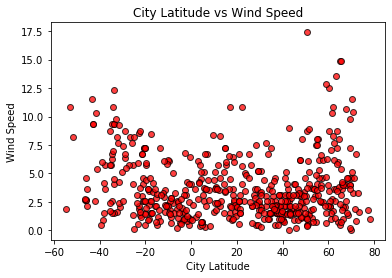

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [118]:
#scatter plot lat vs cloudiness
x_axis = weather_data['Lat']

# Create a list of data that we will use for our y values
y_axis = weather_data['Wind Speed']

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("City Latitude")
plt.show()

#save chart to a .png file
plt.savefig("cityLat_vs_windSpeed.png")
plt.show

In [119]:
# create Northern Hemisphere
northern_df = weather_data[weather_data['Lat']>=0]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,Saint George,1,US,1580024619,57,37.10,-113.58,7.00,1.50
6,Severo-Kuril'sk,100,RU,1580024619,91,50.68,156.12,-7.86,17.39
8,Butaritari,36,KI,1580024619,72,3.07,172.79,29.47,2.77
10,Praia,75,CV,1580024620,78,14.92,-23.51,22.00,7.20
11,Male,100,MV,1580024620,73,4.17,73.51,27.67,4.47
...,...,...,...,...,...,...,...,...,...
535,Mandera,56,KE,1580024700,34,3.94,41.87,34.62,5.75
536,Kysyl-Syr,97,RU,1580024700,94,63.90,122.76,-31.62,5.79
538,Mergen,0,CN,1580024701,88,49.18,125.22,-15.49,3.04
539,Kirkwall,100,GB,1580024701,87,58.98,-2.96,7.00,12.90


In [120]:
# create Southern Hemisphere
southern_df = weather_data[weather_data['Lat']<0]
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mar del Plata,33,AR,1580024619,93,-38.00,-57.56,16.67,1.55
1,Hervey Bay,40,AU,1580024619,58,-25.30,152.85,30.00,5.70
2,Rundu,1,NA,1580024619,78,-17.93,19.77,24.00,2.60
4,Richards Bay,0,ZA,1580024619,70,-28.78,32.04,28.73,6.37
5,Hermanus,0,ZA,1580024619,66,-34.42,19.23,19.44,6.26
...,...,...,...,...,...,...,...,...,...
529,Panguipulli,20,CL,1580024699,100,-39.63,-72.33,15.00,0.50
530,Belmonte,90,BR,1580024699,88,-15.86,-38.88,26.00,3.60
531,Mareeba,100,AU,1580024700,94,-17.00,145.43,26.11,1.50
533,Sambava,100,MG,1580024700,91,-14.27,50.17,26.72,1.76


In [121]:
#create x_axis and y_axis variables for north and south hemispheres, and various charts

x_north = northern_df['Lat']
x_south = southern_df['Lat']

#create titles and variable for each chart
title1 = "Northern Hemisphere - Temperature (F) vs. Latitude"
y_north_temp = northern_df['Max Temp']

title2 = "Southern Hemisphere - Temperature (F) vs. Latitude"
y_south_temp = southern_df['Max Temp']

title3 = "Northern Hemisphere - Humidity (%) vs. Latitude"
y_north_humidity = northern_df['Humidity']

title4 = "Southern Hemisphere - Humidity (%) vs. Latitude"
y_south_humidity = southern_df['Humidity']

title5 = "Northern Hemisphere - Cloudiness (%) vs. Latitude"
y_north_clouds = northern_df['Cloudiness']

title6 = "Southern Hemisphere - Cloudiness (%) vs. Latitude"
y_south_clouds = southern_df['Cloudiness']

title7 = "Northern Hemisphere - Wind Speed (mph) vs. Latitude"
y_north_wind = northern_df['Wind Speed']

title8 = "Southern Hemisphere - Wind Speed (mph) vs. Latitude"
y_south_wind = southern_df['Wind Speed']

#create x label to be used for all charts
x_label = "Latitude"


# #Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: -0.8875353452484949


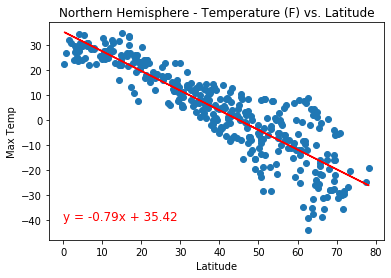

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [122]:
# Create northern hemisphere - temp vs lat with linear regression and r-squared
x_values = x_north
y_values = y_north_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=12,color="red")
plt.title(title1)
plt.xlabel(x_label)
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

#save chart to a .png file
plt.savefig("northHemLat_vs_temp.png")
plt.show

# Southern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.5155078016021387


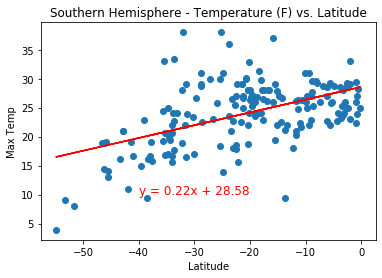

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [123]:
# Create southern hemisphere - temp vs lat with linear regression and r-squared
x_values = x_south
y_values = y_south_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=12,color="red")
plt.title(title2)
plt.xlabel(x_label)
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

#save chart to a .png file
plt.savefig("southHemLat_vs_temp.png")
plt.show

# Northern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.39408247460973267


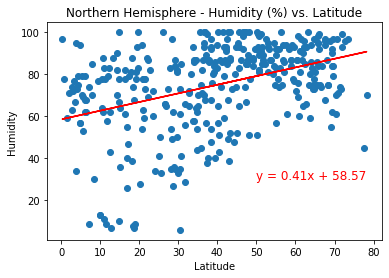

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [124]:
# Create northern hemisphere - humidity vs lat with linear regression and r-squared
x_values = x_north
y_values = y_north_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.title(title3)
plt.xlabel(x_label)
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

#save chart to a .png file
plt.savefig("northHemLat_vs_humidity.png")
plt.show

# Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.27943204883833794


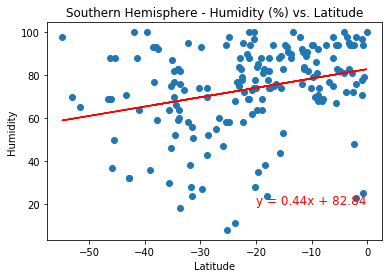

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [125]:
# Create southern hemisphere - humidity vs lat with linear regression and r-squared
x_values = x_south
y_values = y_south_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=12,color="red")
plt.title(title4)
plt.xlabel(x_label)
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("southHemLat_vs_humidity.png")
plt.show

# Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.21769150210973964


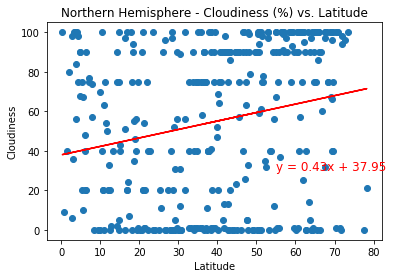

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [126]:
# Create northern hemisphere - cloudiness vs lat with linear regression and r-squared
x_values = x_north
y_values = y_north_clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,30),fontsize=12,color="red")
plt.title(title5)
plt.xlabel(x_label)
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("northHemLat_vs_cloudiness.png")
plt.show

# #Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.22680957092783763


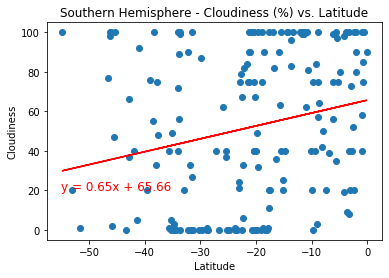

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [127]:
# Create southern hemisphere - cloudiness vs lat with linear regression and r-squared
x_values = x_south
y_values = y_south_clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.title(title6)
plt.xlabel(x_label)
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("southHemLat_vs_cloudiness.png")
plt.show

# Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.14725856110080376


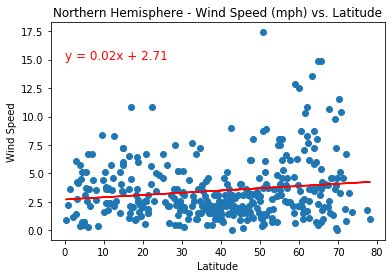

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [128]:
# Create northern hemisphere - wind speed vs lat with linear regression and r-squared
x_values = x_north
y_values = y_north_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=12,color="red")
plt.title(title7)
plt.xlabel(x_label)
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("northHemLat_vs_windSpeed.png")
plt.show

# Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: -0.42096354832855887


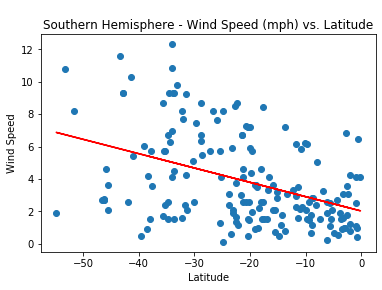

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [129]:
# Create southern hemisphere - wind speed vs lat with linear regression and r-squared
x_values = x_south
y_values = y_south_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,14),fontsize=12,color="red")
plt.title(title8)
plt.xlabel(x_label)
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("southHemLat_vs_windSpeed.png")
plt.show